In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv
/kaggle/input/sevennimage/Seven.png


**Importing all the necessary packages**

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import cv2

Using TensorFlow backend.


Importing MNIST dataset (available on Kaggle)

In [3]:
mnist_test = pd.read_csv("../input/mnist-in-csv/mnist_test.csv")
mnist_train = pd.read_csv("../input/mnist-in-csv/mnist_train.csv")

Checking out a few top rows of the dataset

In [4]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Processing the labels

In [5]:
y_train=mnist_train['label'].to_numpy()
y_test=mnist_test['label'].to_numpy()
print("y_train_shape=", y_train.shape)
y_train.resize(60000,1)
print("new_y_train_shape=", y_train.shape)
y_test.resize(y_test.shape[0], 1)
print("new_y_test_shape=", y_train.shape)

y_train_shape= (60000,)
new_y_train_shape= (60000, 1)
new_y_test_shape= (60000, 1)


Processing the training examples

In [6]:
x_train=mnist_train.loc[:, mnist_train.columns!='label']
x_test=mnist_test.loc[:, mnist_test.columns!='label']
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()

In [7]:
x_train1=x_train.reshape(60000,-1)
x_test1=x_test.reshape(x_test.shape[0],-1)
x_train2=x_train1.reshape(60000,28,28,1)
x_test2=x_test1.reshape(x_test1.shape[0],28,28,1)
x_train3=x_train2.astype('float32')/255
x_test3=x_test2.astype('float32')/255

Displaying an image fromt he dataset

[2]


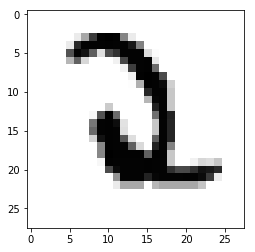

In [8]:
plt.imshow(x_train2[400].squeeze(),cmap='Greys')
print(y_train[400])

Creating the model using Keras, adding 20% dropout regularization to reduce overfitting

In [9]:
input_shape=(28,28,1)
model = Sequential() 
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(250,activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Compiling and fitting the dataset. A batch size of 2000 and 10 epochs are used.

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x= x_train3 , y = y_train , batch_size= 2000, epochs= 10)#

Epoch 1/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.7215 - accuracy: 0.8108
Epoch 2/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.2652 - accuracy: 0.9207
Epoch 3/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.1948 - accuracy: 0.9434
Epoch 4/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.1531 - accuracy: 0.9557
Epoch 5/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.1240 - accuracy: 0.9642
Epoch 6/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.1010 - accuracy: 0.9714
Epoch 7/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.0853 - accuracy: 0.9755
Epoch 8/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0749 - accuracy: 0.9784
Epoch 9/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.0638 - accuracy: 0.9821
Epoch 10/10
60000/60000 [============

Evaluating the model.

In [11]:
model.evaluate(x_test3, y_test)

10000/10000 [==============================] - 1s 144us/step


[0.06228680655155331, 0.9804999828338623]

Checking one of the training examples prediction.

predicted= [7]
actual= 7


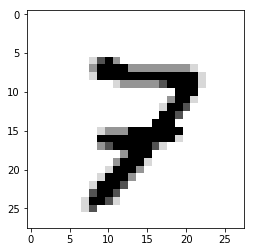

In [12]:
print("predicted=", np.argmax(model.predict(x_test3[510:511]), axis=1))
print("actual=", y_test[510:511].squeeze())
plt.imshow(x_test2[510].squeeze(), cmap='Greys')

Importing an image of hand-written digit created using Paint.

numpy.ndarray

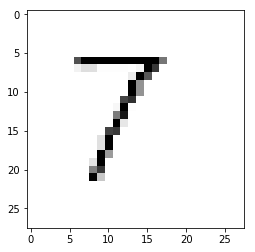

In [13]:
test_image=cv2.imread(r"../input/sevennimage/Seven.png")
test_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
test_image=np.invert(test_image)
plt.imshow(test_image.squeeze(), cmap='Greys')
type(test_image)
#ti=cv2.resize(test_image, (28,28), interpolation=cv2.INTER_AREA)
#plt.imshow(ti, cmap="Greys")

(2, 28, 28, 1)

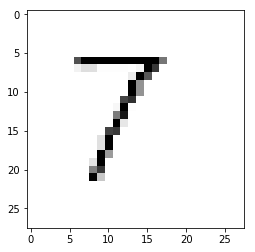

In [14]:
ti=(test_image.astype("float32"))/255
plt.imshow(ti.squeeze(), cmap='Greys')
ti.resize(28,28,1)
ti.shape
#plt.imshow(ti.squeeze(), cmap='Greys')
images=np.array([ti,ti])
images.shape

Checking the model's prediction

In [15]:
print("Predicted number is %s." %np.argmax(model.predict(images[0:1]), axis=1).squeeze())

Predicted number is 7.


So the model predicted correctly.